# 这是测试fnl数据切片的文档

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

filename = "/home/liyuan3970/Data/data/meto_data/fnl/fnl_20190809_18_00.nc"
data = xr.open_dataset(filename)
data = data.metpy.parse_cf().squeeze()

#print(data['TMP_P0_L100_GLL0'])
print(data)

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longi

<xarray.Dataset>
Dimensions:              (lat_0: 181, lon_0: 360, lv_AMSL1: 3, lv_DBLL13: 4, lv_HTGL2: 3, lv_HTGL4: 2, lv_HTGL8: 7, lv_ISBL0: 34, lv_ISBL10: 29, lv_ISBL12: 24, lv_ISBL5: 31, lv_ISBL7: 22, lv_ISBL9: 21, lv_PVL3: 2, lv_SIGL6: 4, lv_SPDL11: 2)
Coordinates:
  * lat_0                (lat_0) float32 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * lon_0                (lon_0) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    crs                  object Projection: latitude_longitude
  * lv_ISBL0             (lv_ISBL0) float32 40.0 100.0 ... 97500.0 100000.0
  * lv_AMSL1             (lv_AMSL1) float32 1829.0 2743.0 3658.0
  * lv_HTGL2             (lv_HTGL2) float32 2.0 80.0 100.0
  * lv_PVL3              (lv_PVL3) float32 -2e-06 2e-06
  * lv_HTGL4             (lv_HTGL4) float32 2.0 80.0
  * lv_ISBL5             (lv_ISBL5) float32 100.0 200.0 ... 97500.0 100000.0
  * lv_ISBL7             (lv_ISBL7) float32 5000.0 10000.0 ... 97500.0 100000.0
  * lv_HTGL8             (lv_HTGL8) float32

<xarray.DataArray 'TMP_P0_L100_GLL0' (lv_ISBL0: 34, index: 100)>
array([[246.28373718, 246.2461178 , 246.21244819, ..., 244.9366025 ,
        244.59616379, 244.18373871],
       [264.0793457 , 263.96604047, 263.86797975, ..., 256.7963924 ,
        256.62779761, 256.42935181],
       [263.86114502, 263.65137703, 263.43758185, ..., 255.58437393,
        256.33176883, 257.16114044],
       ...,
       [287.02194214, 287.18501317, 287.38265717, ..., 298.95439853,
        299.03391063, 299.12193298],
       [288.36245728, 288.55462923, 288.77750115, ..., 300.72555907,
        300.81265794, 300.91246033],
       [289.80001831, 289.97161426, 290.17770462, ..., 302.4453793 ,
        302.54239543, 302.65000916]])
Coordinates:
    crs       object Projection: latitude_longitude
  * lv_ISBL0  (lv_ISBL0) float32 40.0 100.0 200.0 ... 95000.0 97500.0 100000.0
    lon_0     (index) float64 119.0 119.1 119.2 119.3 ... 124.9 125.0 125.0
    lat_0     (index) float64 50.0 49.78 49.55 49.33 ... 28.19 27.

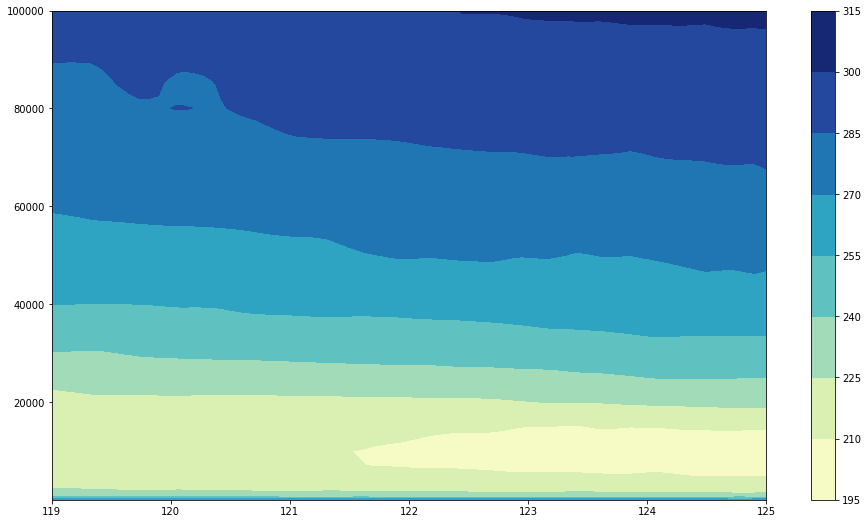

In [28]:

start = (50.0, 119.0)
end = (27.5, 125.0)

#cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
#TMP_P0_L100_GLL0     (lv_ISBL0, lat_0, lon_0) float32 ...
print(cross)
#cross['TMP_P0_L100_GLL0']

# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon_0'], cross['lv_ISBL0'], cross,cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)


<xarray.DataArray 'TMP_P0_L100_GLL0' (lv_ISBL0: 34, index: 100)>
array([[242.88374329, 242.99062647, 243.09766526, ..., 244.65222268,
        244.41826264, 244.18373871],
       [253.22934723, 253.32246299, 253.4158298 , ..., 255.96071836,
        256.19516777, 256.42935181],
       [258.36112976, 258.20592943, 258.05035204, ..., 256.41659781,
        256.78853189, 257.16114044],
       ...,
       [297.52194214, 297.56911379, 297.61631294, ..., 299.24168769,
        299.181771  , 299.12193298],
       [298.96246338, 299.01267221, 299.06292397, ..., 301.05625415,
        300.98430108, 300.91246033],
       [300.3999939 , 300.44716739, 300.49436839, ..., 302.77559751,
        302.71275497, 302.65000916]])
Coordinates:
    crs       object Projection: latitude_longitude
  * lv_ISBL0  (lv_ISBL0) float32 40.0 100.0 200.0 ... 95000.0 97500.0 100000.0
    lon_0     (index) float64 119.0 119.1 119.1 119.2 ... 124.9 124.9 125.0
    lat_0     (index) float64 27.5 27.5 27.5 27.5 27.51 ... 27.5 2

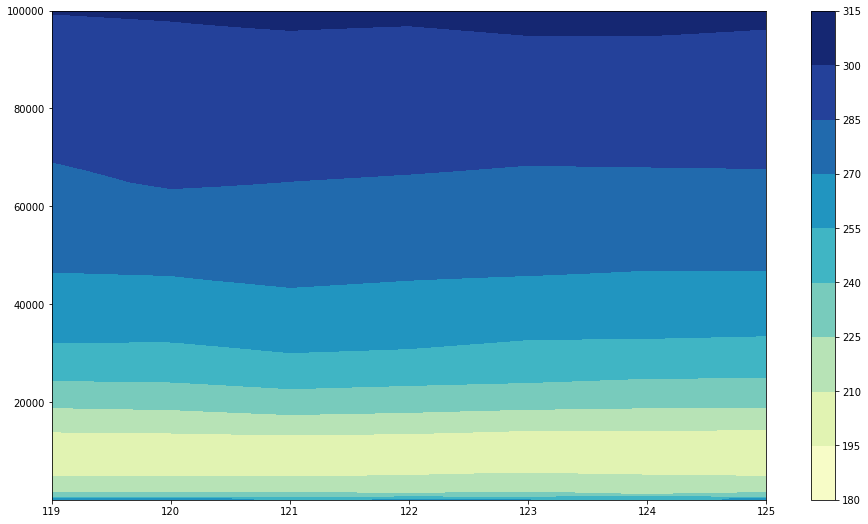

In [26]:

start = (27.5, 119.0)
end = (27.5, 125.0)

#cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
#TMP_P0_L100_GLL0     (lv_ISBL0, lat_0, lon_0) float32 ...
print(cross)
#cross['TMP_P0_L100_GLL0']

# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon_0'], cross['lv_ISBL0'], cross,cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)


<xarray.DataArray 'TMP_P0_L100_GLL0' (lv_ISBL0: 34, index: 100)>
array([[246.28373718, 246.27194835, 246.26017082, ..., 246.44841743,
        246.46607033, 246.48374939],
       [264.0793457 , 264.07344613, 264.06754301, ..., 263.59540949,
        263.58740714, 263.5793457 ],
       [263.86114502, 263.87415487, 263.88709135, ..., 262.54764229,
        262.50443242, 262.46115112],
       ...,
       [287.02194214, 286.99889842, 286.9756991 , ..., 287.17792305,
        287.24991672, 287.32192993],
       [288.36245728, 288.34562516, 288.32863468, ..., 286.74218024,
        286.70249817, 286.66244507],
       [289.80001831, 289.78318435, 289.76619203, ..., 288.17947142,
        288.1399135 , 288.1000061 ]])
Coordinates:
    crs       object Projection: latitude_longitude
  * lv_ISBL0  (lv_ISBL0) float32 40.0 100.0 200.0 ... 95000.0 97500.0 100000.0
    lon_0     (index) float64 119.0 119.1 119.1 119.2 ... 124.9 124.9 125.0
    lat_0     (index) float64 50.0 50.0 50.0 50.0 50.01 ... 50.0 5

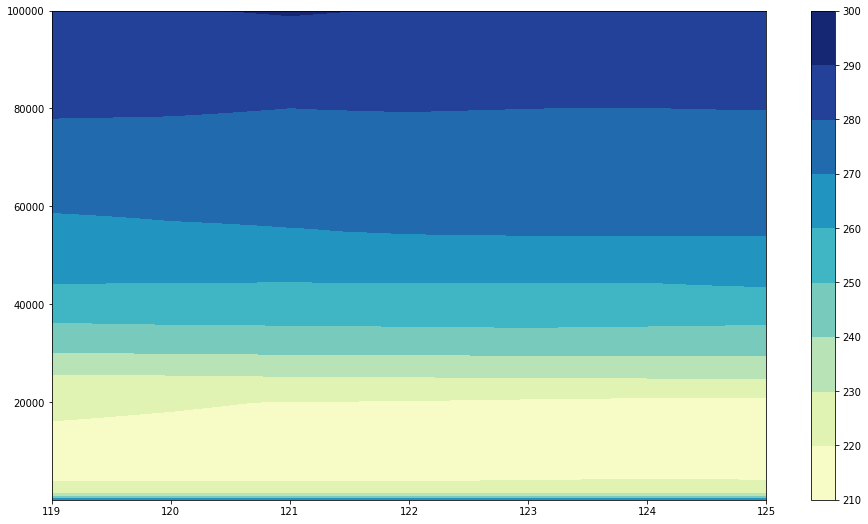

In [29]:
start = (50, 119.0)
end = (50, 125.0)

#cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
#TMP_P0_L100_GLL0     (lv_ISBL0, lat_0, lon_0) float32 ...
print(cross)
#cross['TMP_P0_L100_GLL0']

# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon_0'], cross['lv_ISBL0'], cross,cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)
